# Adams Predictor Corrector
The Adams Predictor corrector method is used to side step the issue of the Adams-Moulton method being implicit. It can also be used to estimate error when the solution is unknown.
## Intial Value Problem

The differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1$$
will be used to illustrate the method.

## Python Libraries

In [1]:
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=b−ah.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t0=a.$

Here the interval is  $0≤t≤2$  and number of step  4 
$$h=\frac{2−0}{4}=0.5.$$
 
This gives the discrete time steps,
$$t_i=0+i0.5,$$
for  $i=0,1,⋯,4.$

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.5')

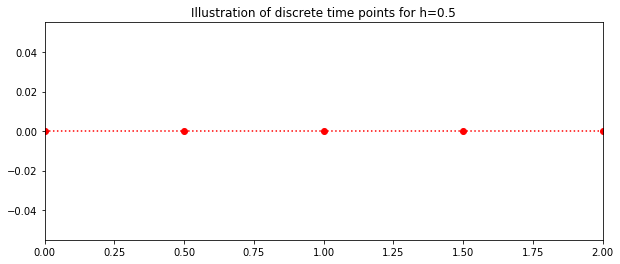

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Exact Solution
THe initial value problem has the exact solution
$$y(t)=2e^{-t}+t-1.$$
The figure below plots the exact solution.

Text(0.5, 0, 'time')

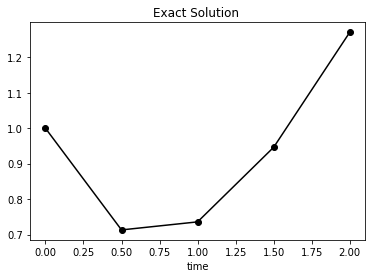

In [4]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')

In [5]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC



## 2-step Adams Bashforth (Predictor)

The 2-step Adams Bashforth difference equation is
$$w^{0}_{i+1} = w_{i} + \frac{h}{2}(3f(t_i,w_i)-f(t_{i-1},w_{i-1})) $$
$$w^{0}_{i+1} = w_{i} + \frac{h}{2}(3(t_i-w_i)-(t_{i-1}-w_{i-1})) $$
## 1-step Adams Moulton (Corrector)
$$w^{1}_{i+1} = w_{i} + \frac{h}{2}(f(t_{i+1},w^{0}_{i+1})+f(t_{i},w_{i})) $$

$$ w^{1}_{i+1} = w_{i} + \frac{h}{2}((t_{i+1}-w^0_{i+1})+(t_{i}-w_{i})) $$


For $i=0$ the system of difference equation is:
$$w^{0}_{1} = w_{0} + \frac{h}{2}(3(t_0-w_0)-(t_{-1}-w_{-1})) $$
$$w_{1} = w_{0} + \frac{h}{2}((t_{1}-w^{0}_{1})+(t_{0}-w_{0})). $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w^{0}_{2} = w_{1} + \frac{h}{2}(3(t_1-w_1)-(t_{0}-w_{0})) $$
$$w_{2} = w_{1} + \frac{h}{2}((t_{2}-w^{0}_{2})+(t_{1}-w_{1})). $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [6]:
### Initial conditions
w=np.zeros(len(t))
w0=np.zeros(len(t))
w[0]=IC
w[1]=y[1]
w0[0]=IC
w0[1]=y[1]

### Loop

In [7]:
for k in range (1,N):
    w0[k+1]=(w[k]+h/2.0*(3*myfun_ty(t[k],w[k])-myfun_ty(t[k-1],w[k-1])))   
    w[k+1]=(w[k]+h/2.0*(myfun_ty(t[k+1],w0[k+1])+myfun_ty(t[k],w[k])))   

### Plotting solution

In [8]:
def plotting(t,w,w0,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w0,'v:',color='blue',label='Adams-Bashforth Predictor')
    plt.plot(t,w,'^:',color='red',label='Adams-Moulton Corrector')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the Adams Predictor Corrector approximation (red) of the intial value problem

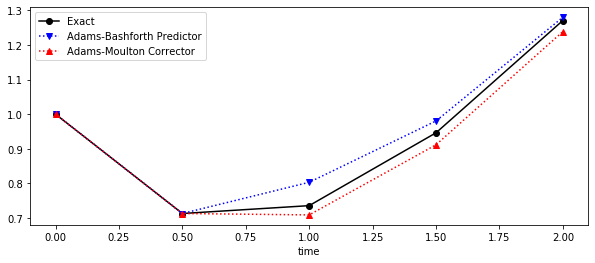

In [9]:
plotting(t,w,w0,y)

## Local Error 
The error for the 1 step Adams Moulton is:
$$\frac{y_{n+1}-y_{n}}{h}=\frac{1}{2}[f(t_{n+1},w_{n+1})+f(t_{n-1},w_{n-1})] +\frac{-h^2}{12}y^{(3)}(\eta),$$
where $\eta \in [t_{n-1},t_{n+1}]$.
The error for the 2 step Adams Bashforth is:
$$\frac{y_{n+1}-y_{n}}{h}=\frac{1}{2}[3f(t_{n},w_{n})-f(t_{n},w_{n})] +\frac{5h^2}{12}y^{(3)}(\xi),$$
where $\xi \in [t_{n-1},t_{n+1}]$.

Rearranging the equations gives 
$$\frac{w_{n+1}-w_{n+1}^0}{h}= h^2[\frac{y^{(3)}(\eta)}{12}+\frac{5y^{(3)}(\xi)}{12}]\approx h^2[\frac{6}{12}y^{(3)}(\xi)].$$
Making the assumption that 
$$y^{(3)}(\xi)\approx \frac{12}{6h^2}\frac{w_{n+1}-w_{n+1}^0}{h}$$
$$y^{(3)}(\xi)\approx \frac{12}{6h^2}\frac{w_{n+1}-w_{n+1}^0}{h}$$

In [15]:

d = {'time t_i': t, 'Adams Predictor w0': w0,
     'Adams Corrector':w,'Exact (y)':y,'|w-y|':np.round(np.abs(y-w),5),'|w0-w|':np.round(np.abs(w0-w),5),'estimate LTE':np.round(1/(6*h)*abs(w0-w),5)}
df = pd.DataFrame(data=d)
df

,time t_i,Adams Predictor w0,Adams Corrector,Exact (y),|w-y|,|w0-w|,estimate LTE
0,0.0,1.000000,1.000000,1.000000,0.00000,0.00000,0.00000
1,0.5,0.713061,0.713061,0.713061,0.00000,0.00000,0.00000
2,1.0,0.803265,0.708980,0.735759,0.02678,0.09429,0.03143
3,1.5,0.980510,0.911607,0.946260,0.03465,0.06890,0.02297
4,2.0,1.280147,1.238669,1.270671,0.03200,0.04148,0.01383
